# Data Wrangling/EDA/Feature Engineering

Missing value Traetment

Scaling Technique

Outlier Treatment

Encoding Technique

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import files

# This will open a file chooser dialog to upload the dataset
uploaded = files.upload()

Saving breast-cancer-data.csv to breast-cancer-data.csv
Saving CNN.xlsx to CNN.xlsx
Saving Diabetes_Preprocessing.csv to Diabetes_Preprocessing.csv
Saving k_circle_sales.csv to k_circle_sales.csv


In [4]:
data=pd.read_csv("k_circle_sales.csv")

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [6]:
data.shape

(8523, 13)

In [7]:
# Missing value treatment

data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,748
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,2050


In [8]:
data.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [9]:
#drop the missing data
# fill the fixed value
# fill with mean,median,mode value
# based on grouping

In [10]:
data1=data.copy()
data1=data.dropna()

In [11]:
len(data1)

5365

In [12]:
print("Percentage data loss",(len(data)-len(data1))/(len(data))*100)

Percentage data loss 37.05268098087528


In [13]:
data2=data.copy()
data2=data.dropna(subset=["Item_Weight"])

In [14]:
len(data2)

7775

In [15]:
# Imputaion technique

In [16]:
data3=data.copy()

In [17]:
data3.isnull().sum()

,0
Item_Identifier,0
Item_Weight,748
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,2050


In [18]:
# numerical analysis
data3["Item_Weight"].skew()

0.0972083550326145

<Axes: ylabel='Density'>

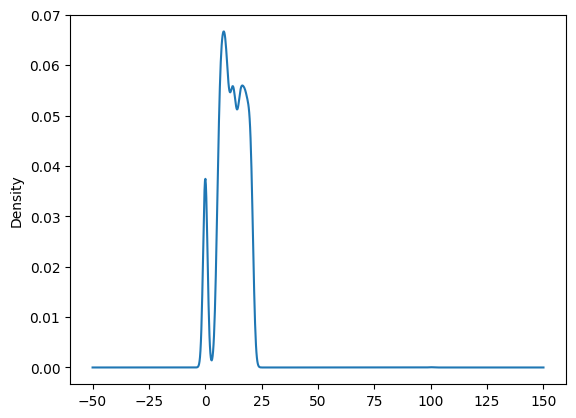

In [19]:
data3["Item_Weight"].plot(kind="kde")

In [20]:
# fill the missing value with fixed value
data3["Item_Weight"]=data3["Item_Weight"].fillna(75)

In [21]:
data3.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,2050


<Axes: ylabel='Density'>

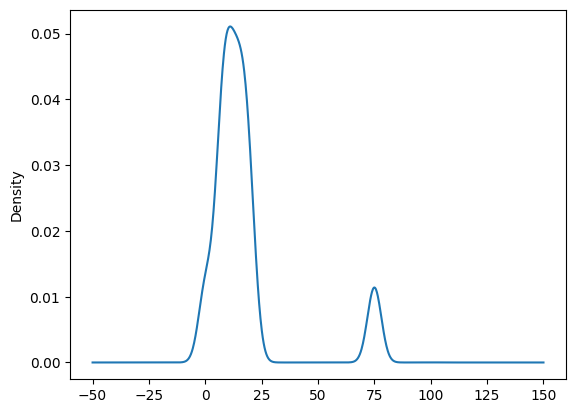

In [22]:
data3["Item_Weight"].plot(kind="kde")

In [23]:
# fill the missing value with mean or median
data4=data.copy()
data4["Item_Weight"].fillna(data4["Item_Weight"].mean(),inplace=True)

<ipython-input-23-138da14753fe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data4["Item_Weight"].fillna(data4["Item_Weight"].mean(),inplace=True)


In [24]:
data4.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,2050


<Axes: ylabel='Density'>

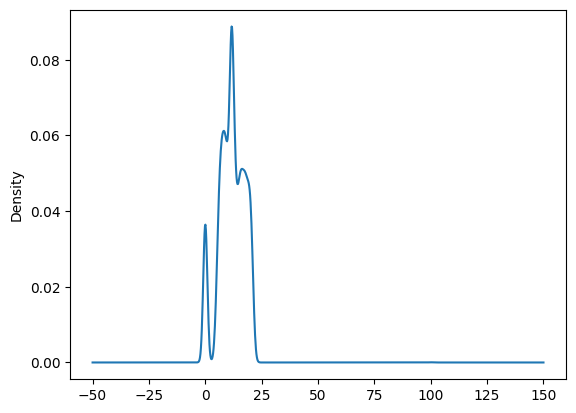

In [25]:
data4["Item_Weight"].plot(kind="kde")

In [26]:
data["Item_Weight"].mean()

11.68809967845659

In [27]:
data["Item_Weight"].describe()

,Item_Weight
count,7775.000000
mean,11.688100
std,5.862684
min,0.000000
25%,7.720000
50%,11.800000
75%,16.500000
max,100.000000


In [28]:
data5=data.copy()
ind=data5[data5["Item_Weight"]==0].index

In [29]:
ind

Index([  36,   38,   39,   49,   59,   62,   63,   64,   77,   83,
       ...
       8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
      dtype='int64', length=714)

In [30]:
data5.loc[ind,"Item_Weight"]=np.nan

In [31]:
data5.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1462
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,2050


In [32]:
748+714


1462

In [33]:
data5["Item_Weight"].describe()

,Item_Weight
count,7061.000000
mean,12.869987
std,4.757530
min,4.555000
25%,8.775000
50%,12.600000
75%,16.850000
max,100.000000


<Axes: ylabel='Density'>

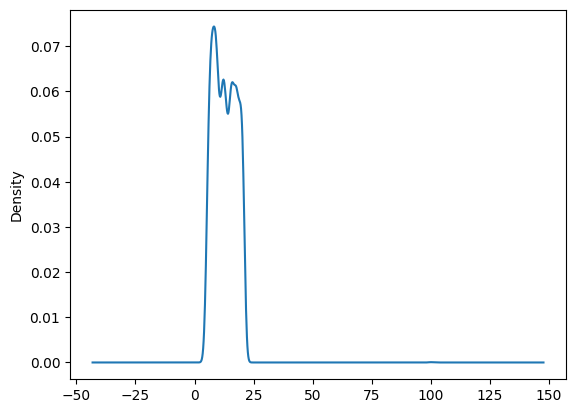

In [34]:
data5["Item_Weight"].plot(kind="kde")

In [35]:
#data5["Item_Weight"].fillna(data5["Item_Weight"].mean(),inplace=True)

In [36]:
data5["Item_Weight"].isnull().sum()

1462

In [37]:
data5.groupby("Item_Identifier")["Item_Weight"].mean()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [38]:
data5["Item_Weight"]=data5["Item_Weight"].fillna(data5.groupby("Item_Identifier")["Item_Weight"].transform('mean'))

In [39]:
data5.isnull().sum()

,0
Item_Identifier,0
Item_Weight,4
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,2050


<Axes: ylabel='Density'>

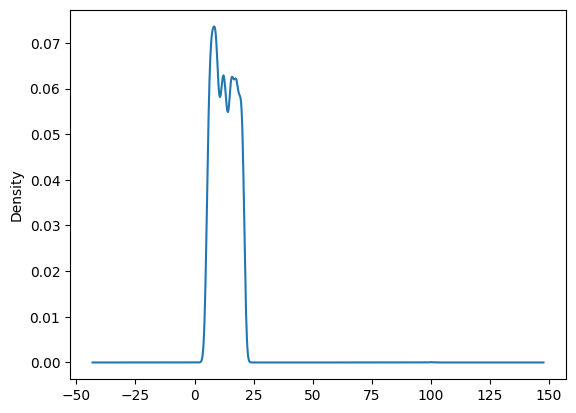

In [40]:
data5["Item_Weight"].plot(kind="kde")

In [41]:
# categorical data

data5["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [42]:
data5["Outlet_Size"].nunique()

3

In [43]:
data5["Outlet_Size"].mode()

,Outlet_Size
0,Medium


In [44]:
data5["Outlet_Size"]=data5["Outlet_Size"].fillna(data5["Outlet_Size"].mode()[0])

In [45]:
data5.isnull().sum()

,0
Item_Identifier,0
Item_Weight,4
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,2050


In [46]:
# Outlier Treatment

data_num=data.select_dtypes(include=np.number)

data_cat=data.select_dtypes(exclude=np.number)


In [47]:
data_num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

In [48]:
data_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

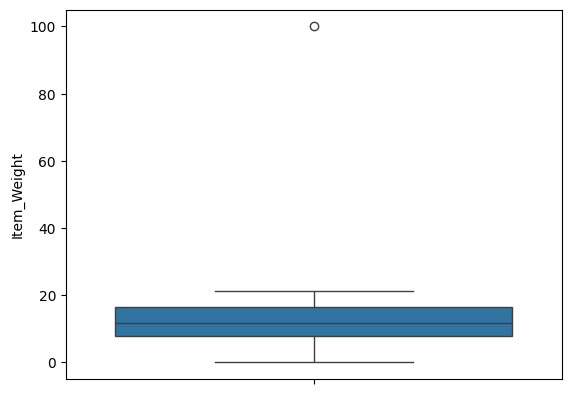

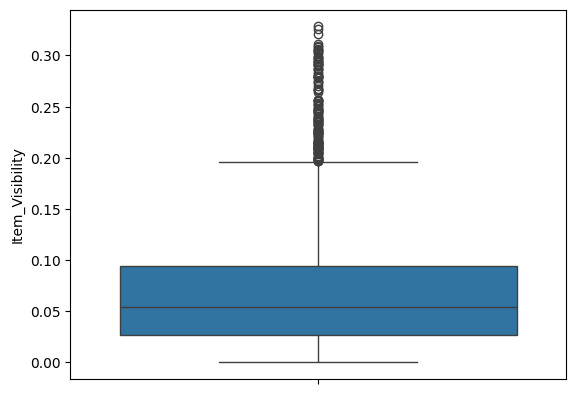

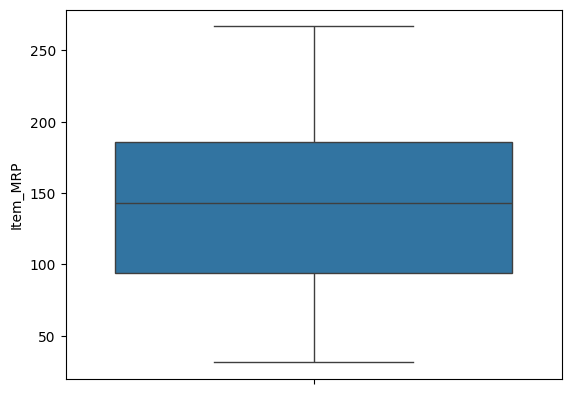

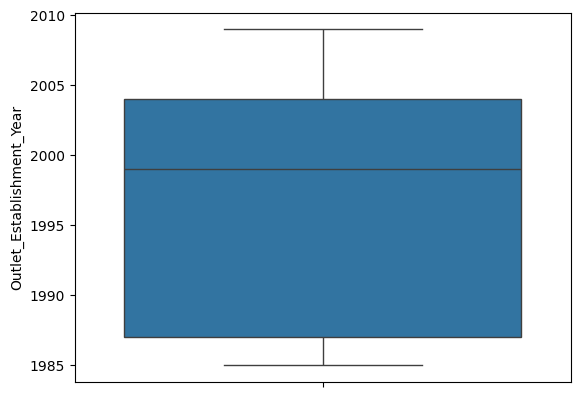

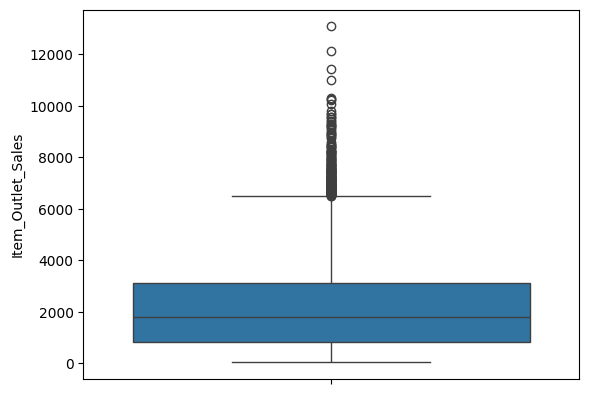

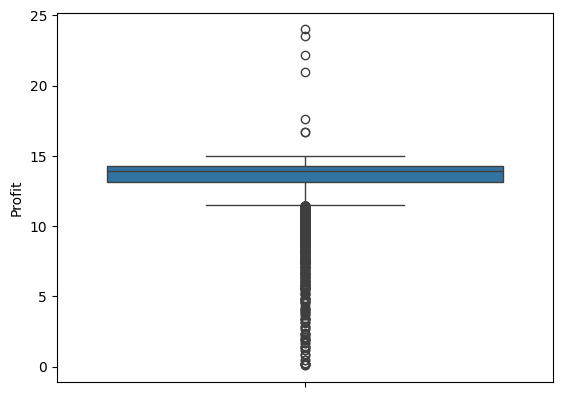

In [49]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.show()

In [50]:
# outlier for item outlet sale
q1=data_num["Item_Outlet_Sales"].quantile(0.25)

q3=data_num["Item_Outlet_Sales"].quantile(0.75)

iqr=q3-q1

UB= q3+ 1.5*iqr

LB=q1- 1.5*iqr

print(LB,UB)


-2566.3261 6501.8699


In [51]:
lowerindex=data_num[data_num["Item_Outlet_Sales"]<LB]
upperindex=data_num[data_num["Item_Outlet_Sales"]>UB]

In [52]:
upperindex

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
43,21.35,0.069103,259.9,2009,6768.5228,12.4
130,0.00,0.033810,180.6,1985,7968.2944,14.7
132,0.00,0.144338,224.4,1985,6976.2524,14.3
145,18.60,0.039356,246.4,1999,7370.4060,12.8
203,NaN,0.078362,177.9,1985,6704.6060,13.8
...,...,...,...,...,...,...
8245,16.20,0.035967,260.3,1999,7549.5062,13.6
8329,0.00,0.041622,253.6,1985,6630.0364,14.6
8350,10.00,0.021421,248.4,2004,7240.5750,13.5
8447,20.35,0.089975,261.7,2007,7588.1226,14.4


In [53]:
data_num["Item_Outlet_Sales"]=np.where(data_num["Item_Outlet_Sales"]<LB,LB,data_num["Item_Outlet_Sales"])
data_num["Item_Outlet_Sales"]=np.where(data_num["Item_Outlet_Sales"]>UB,UB,data_num["Item_Outlet_Sales"])


<Axes: ylabel='Item_Outlet_Sales'>

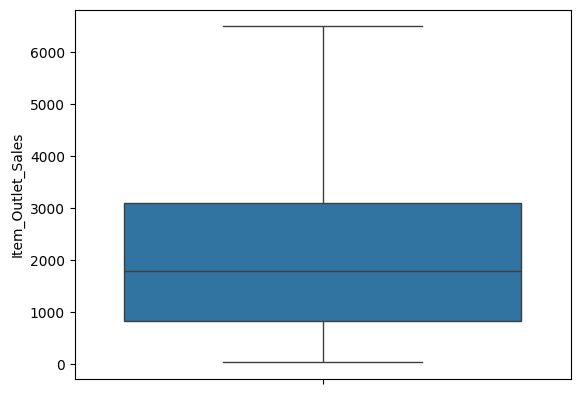

In [54]:
sns.boxplot(data_num["Item_Outlet_Sales"])

In [55]:
# Apply for all columns

for i in data_num.columns:
    q1=data_num[i].quantile(0.25)

    q3=data_num[i].quantile(0.75)

    iqr=q3-q1

    UB= q3+ 1.5*iqr

    LB=q1- 1.5*iqr
    data_num[i]=np.where(data_num[i]<LB,LB,data_num[i])
    data_num[i]=np.where(data_num[i]>UB,UB,data_num[i])



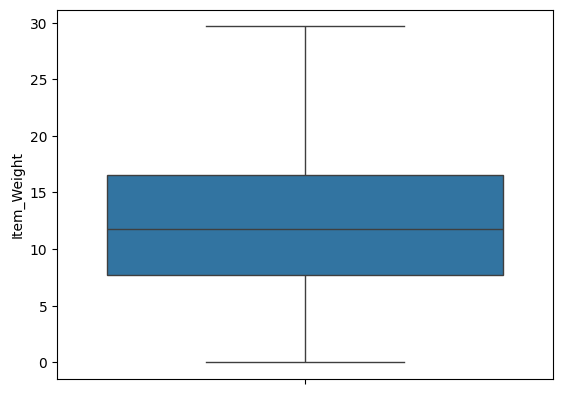

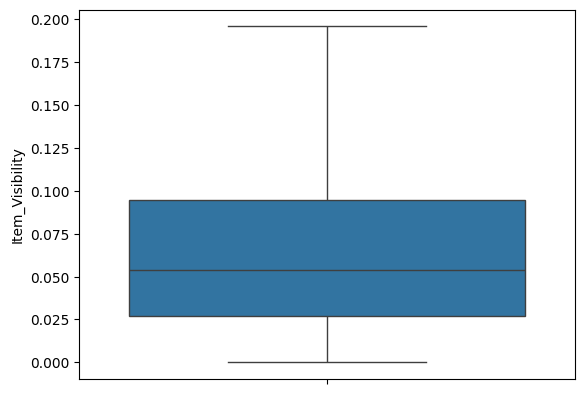

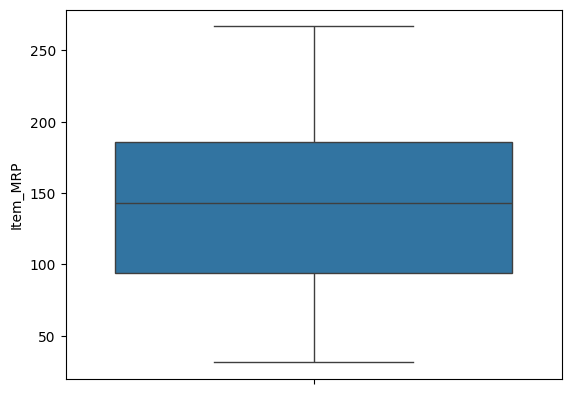

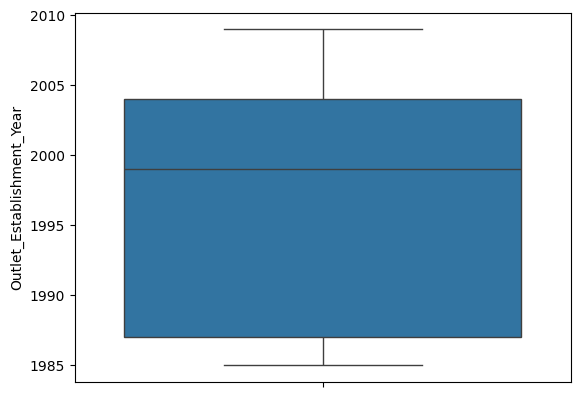

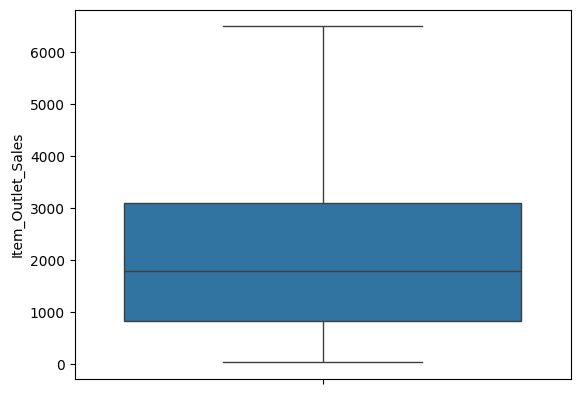

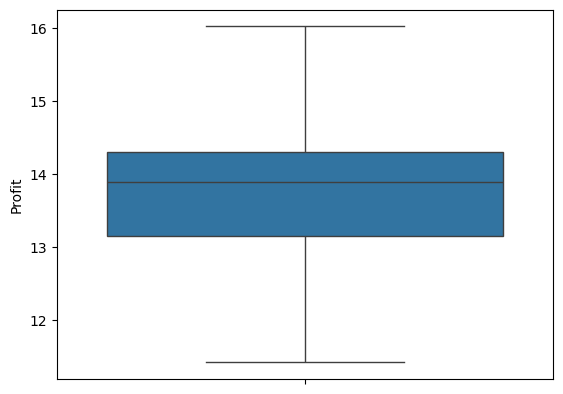

In [56]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.show()

# Scaling/Normalization

In [57]:
data_num=data.select_dtypes(include=np.number)
data_num.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,9.30,0.016047,249.8,1999,3735.1380,11.5
1,5.92,0.019278,48.3,2009,443.4228,14.3
2,17.50,0.016760,141.6,1999,2097.2700,14.5
3,19.20,0.000000,182.1,1998,732.3800,13.6
4,8.93,0.000000,53.9,1987,994.7052,14.1


In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
datanum_sc=sc.fit_transform(data_num)

In [59]:
datanum_sc

array([[-0.4073652 , -0.97073217,  1.74768499,  0.13954076,  0.910601  ,
        -1.12503308],
       [-0.98393007, -0.90811123, -1.48903161,  1.33410274, -1.01844035,
         0.52034176],
       [ 0.99140164, -0.95691733,  0.00965652,  0.13954076, -0.04923754,
         0.63786854],
       ...,
       [-0.18560948, -0.59978449, -0.89790917,  0.73682175, -0.57909963,
        -2.30030082],
       [-0.76388016,  1.53287976, -0.6087732 ,  1.33410274, -0.19672492,
         0.46157837],
       [ 0.53083207, -0.41193591, -1.05211502, -0.09937163, -0.82959407,
         0.69663192]])

In [60]:
datanum_sc=pd.DataFrame(datanum_sc)

datanum_sc.head()

datanum_sc.columns=data_num.columns

In [61]:
datanum_sc.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,-0.407365,-0.970732,1.747685,0.139541,0.910601,-1.125033
1,-0.983930,-0.908111,-1.489032,1.334103,-1.018440,0.520342
2,0.991402,-0.956917,0.009657,0.139541,-0.049238,0.637869
3,1.281390,-1.281758,0.660212,0.020085,-0.849103,0.108998
4,-0.470480,-1.281758,-1.399078,-1.293934,-0.695373,0.402815


In [62]:
datanum_sc.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7.775000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,3.335667e-16,-1.092117e-16,4.460171e-17,1.156560e-14,1.638175e-16,1.850762e-16
std,1.000064e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.993771e+00,-1.281758e+00,-1.762104e+00,-1.532846e+00,-1.258790e+00,-7.824059e+00
25%,-6.768837e-01,-7.586531e-01,-7.581601e-01,-1.293934e+00,-7.894057e-01,-1.554372e-01
50%,1.908810e-02,-2.364792e-01,2.732594e-02,1.395408e-01,-2.267687e-01,2.852882e-01
75%,8.208203e-01,5.514755e-01,7.172365e-01,7.368218e-01,5.391513e-01,5.203418e-01
max,1.506436e+01,5.083050e+00,2.022364e+00,1.334103e+00,6.391045e+00,6.220390e+00


In [63]:
# min max scalar
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm_scale=mm.fit_transform(data_num)

In [64]:
mm_scale=pd.DataFrame(mm_scale)

mm_scale.columns=data_num.columns

mm_scale

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,0.09300,0.048866,0.927419,0.583333,0.283587,0.476987
1,0.05920,0.058705,0.072156,1.000000,0.031419,0.594142
2,0.17500,0.051037,0.468166,0.583333,0.158115,0.602510
3,0.19200,0.000000,0.640068,0.541667,0.053555,0.564854
4,0.08930,0.000000,0.095925,0.083333,0.073651,0.585774
...,...,...,...,...,...,...
8518,0.06865,0.172914,0.777589,0.083333,0.210293,0.585774
8519,0.08380,0.143069,0.326401,0.708333,0.039529,0.589958
8520,0.10600,0.107148,0.228353,0.791667,0.088850,0.393305
8521,0.07210,0.442219,0.304754,1.000000,0.138835,0.589958


In [65]:
mm_scale.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7775.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.116881,0.201382,0.465615,0.534661,0.164551,0.557093
std,0.058627,0.157123,0.264253,0.348823,0.130729,0.071207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.077200,0.082187,0.265280,0.083333,0.061359,0.546025
50%,0.118000,0.164228,0.472835,0.583333,0.134908,0.577406
75%,0.165000,0.288026,0.655136,0.791667,0.235030,0.594142
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
data_num.skew()# original data

,0
Item_Weight,0.097208
Item_Visibility,1.167091
Item_MRP,0.127390
Outlet_Establishment_Year,-0.396641
Item_Outlet_Sales,1.177531
Profit,-3.379808


In [67]:
mm_scale.skew()

,0
Item_Weight,0.097208
Item_Visibility,1.167091
Item_MRP,0.127390
Outlet_Establishment_Year,-0.396641
Item_Outlet_Sales,1.177531
Profit,-3.379808


In [68]:
datanum_sc.skew()

,0
Item_Weight,0.097208
Item_Visibility,1.167091
Item_MRP,0.127390
Outlet_Establishment_Year,-0.396641
Item_Outlet_Sales,1.177531
Profit,-3.379808


# Encoding Technique

In [69]:

# label encoder
data5=data.copy()

In [70]:
data5.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [71]:
data5.dropna(inplace=True)

In [72]:
data5["Outlet_Size"].nunique()

3

In [73]:
data5["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [74]:
# Label encoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data5["outletsize_le"]=le.fit_transform(data5["Outlet_Size"])

In [75]:
data5[["Outlet_Size","outletsize_le"]]

,Outlet_Size,outletsize_le
0,Medium,1
1,Medium,1
2,Medium,1
4,High,0
5,Medium,1
...,...,...
8517,Small,2
8518,High,0
8520,Small,2
8521,Medium,1


In [76]:
#Ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

ode=OrdinalEncoder(categories=[['Small','Medium','High']])

data5['Outlet_Size_ode']=ode.fit_transform(data5[['Outlet_Size']])

In [77]:
data5[["Outlet_Size","outletsize_le","Outlet_Size_ode"]]

,Outlet_Size,outletsize_le,Outlet_Size_ode
0,Medium,1,1.0
1,Medium,1,1.0
2,Medium,1,1.0
4,High,0,2.0
5,Medium,1,1.0
...,...,...,...
8517,Small,2,0.0
8518,High,0,2.0
8520,Small,2,0.0
8521,Medium,1,1.0


In [78]:
# one hot encoding

z=pd.get_dummies(data5["Outlet_Size"])
z

,High,Medium,Small
0,False,True,False
1,False,True,False
2,False,True,False
4,True,False,False
5,False,True,False
...,...,...,...
8517,False,False,True
8518,True,False,False
8520,False,False,True
8521,False,True,False


In [79]:
z1=pd.get_dummies(data5["Outlet_Size"],drop_first=True)
z1

,Medium,Small
0,True,False
1,True,False
2,True,False
4,False,False
5,True,False
...,...,...
8517,False,True
8518,False,False
8520,False,True
8521,True,False
